Data has no missing values
Range of transaction dates: 1/1/2011 - 9/9/2015
The no. of unique customers: 1000
*** Descriptive Statistics for Amount ***
Min: -1.0
Max: 2033.0
Variance: 1499.5411107517461
Standard Deviation: 38.72390877418945
****************************


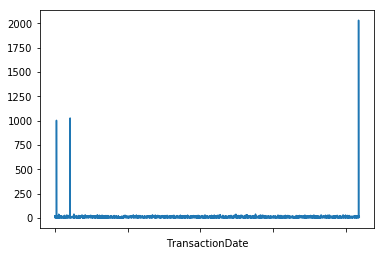

In [4]:
import pandas as pd
import numpy as np

transactions = pd.read_csv('HW1 clv_transactions.csv', index_col = 'TransactionDate')

#To check if data has any missing values
if transactions.isnull().values.any():
    print('Data has missing values')
else:
    print('Data has no missing values')

#To find the range of Transaction Dates
print('Range of transaction dates: '+ transactions.index.min() + ' - ' + transactions.index.max())

#To find the no. of unique customers
print('The no. of unique customers: '+ str(transactions['CustomerID'].nunique()))

#To find the descriptive statistics on the dataset
amount = transactions['Amount']
print('*** Descriptive Statistics for Amount ***')
print('Min: ' + str(amount.min()))
print('Max: ' + str(amount.max()))
print('Variance: ' + str(amount.var()))
print('Standard Deviation: ' + str(amount.std()))
print('****************************')

#To check if transaction amount has increased over time due to inflation
amount.plot()

In [15]:
#Display outliers
print(transactions[~(np.abs(transactions.Amount- transactions.Amount.mean()) <= (3*transactions.Amount.std()))])
print(transactions[~(np.abs(transactions.CustomerID- transactions.CustomerID.mean()) <= (3*transactions.CustomerID.std()))])
print(transactions[~(np.abs(transactions.TransactionID- transactions.TransactionID.mean()) <= (3*transactions.TransactionID.std()))])

#Remove the Amount outliers
cleaned_transactions = transactions[np.abs(transactions.Amount- transactions.Amount.mean()) <= (3*transactions.Amount.std())]
print(cleaned_transactions)


                 TransactionID  CustomerID  Amount
TransactionDate                                   
10/7/2011                   24           7  1003.0
5/14/2014                  212          54  1027.0
8/13/2012                 4178        1000  2033.0
Empty DataFrame
Columns: [TransactionID, CustomerID, Amount]
Index: []
Empty DataFrame
Columns: [TransactionID, CustomerID, Amount]
Index: []
                 TransactionID  CustomerID  Amount
TransactionDate                                   
9/4/2012                     1           1   20.26
5/15/2012                    2           2   10.87
5/23/2014                    3           2    2.21
10/24/2014                   4           2   10.48
10/13/2012                   5           2    3.94
1/23/2013                    6           2   12.37
3/9/2014                     7           2    1.59
11/17/2013                   8           2    2.75
10/10/2014                   9           2    3.51
11/26/2012                  10           3

In [19]:
#Add origin to cleaned data

#Created another column as Origin and set the default values to the current transaction date year
cleaned_transactions['Origin'] =  pd.DatetimeIndex(cleaned_transactions.index).year
#Sorted the transaction data according to dates
cleaned_transactions = cleaned_transactions.sort_index()
#Marked the second occurence onward for the customerid as duplicates
cleaned_transactions['Duplicated'] = cleaned_transactions['CustomerID'].duplicated()


for index, row in cleaned_transactions.iterrows():
    #Replace the origin value wuth the first transaction year if the transaction is a duplicate
    if row['Duplicated'] == True: 
        match = cleaned_transactions[((cleaned_transactions['CustomerID'] == row['CustomerID']) & (cleaned_transactions['Duplicated'] == False))]
        cleaned_transactions.at[index, 'Origin'] = match['Origin']
    
cleaned_transactions.drop(columns = 'Duplicated')

#TODO: Make the origin a range 
    

,TransactionID,CustomerID,Amount,Origin
TransactionDate,,,,
1/1/2011,2870,707,2.46,2011
1/1/2012,1641,403,11.12,2012
1/1/2012,133,34,12.03,2012
1/1/2012,3753,909,14.24,2012
1/1/2012,3756,911,6.59,2012
1/1/2013,220,56,11.61,2013
1/1/2014,3618,876,1.45,2014
1/1/2015,2422,619,4.95,2015
1/10/2011,2695,676,0.80,2011
